In [17]:
import pandas
titanic = pandas.read_csv(r"C:\Users\soft_01\Desktop\learn\learning\Titanic\train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
titanic["Sex"].unique()
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [4]:
titanic["Embarked"].unique()
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

predictors =["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

alg  = LinearRegression()

kf = KFold(n_splits = 3, random_state = 1, shuffle=True)

predictions = []
for train,test in kf.split(titanic):
	train_predictors =(titanic[predictors].iloc[train,:])
	train_target = titanic["Survived"].iloc[train]
	alg.fit(train_predictors,train_target)
	test_predictions = alg.predict(titanic[predictors].iloc[test,:])
	predictions.append(test_predictions)


In [6]:
import numpy as np

predictions = np.concatenate(predictions, axis = 0)

predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0
accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
accuracy

0.5342312008978676

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg  = LogisticRegression(random_state = 1,max_iter = 1000)

scores = model_selection.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=3)

print(scores.mean())

0.7946127946127947


In [8]:
titanic_test = pandas.read_csv(r"C:\Users\soft_01\Desktop\learn\learning\Titanic\test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [9]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

predictors =["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

alg = RandomForestClassifier(random_state = 1,n_estimators=20,min_samples_split=2,min_samples_leaf=1)

kf = model_selection.KFold(n_splits = 3, random_state = 1, shuffle=True)

scores = model_selection.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)

print(scores.mean())

0.7901234567901234


In [10]:
alg = RandomForestClassifier(random_state = 1,n_estimators=100,min_samples_split=2,min_samples_leaf=1)

kf = model_selection.KFold(n_splits = 3, random_state = 1, shuffle=True)

scores = model_selection.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)

print(scores.mean())

0.8080808080808081


In [11]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
titanic["NameLength"] = titanic["Name"].apply(lambda x:len(x))

In [12]:
import re

def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.',name)
	if title_search:
		return title_search.group(1)
	return ""

titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

title_mapping = {"Mr":1, "Miss":2 ,"Mrs":3, "Master":4, "Dr":5, "Rev":6,"Major":7,"Col":7,"Mlle":8,"Countess":8,"Ms":8,"Lady":8,"Jonkheer":9,"Don":9,"Mme":10,"Capt":10,"Sir":10}
for k,v in title_mapping.items():
	titles[titles == k] = v

print(pandas.value_counts(titles))

titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Don           1
Sir           1
Capt          1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Name: Name, dtype: int64
1     517
2     182
3     125
4      40
5       7
6       6
8       5
7       4
10      3
9       2
Name: Name, dtype: int64


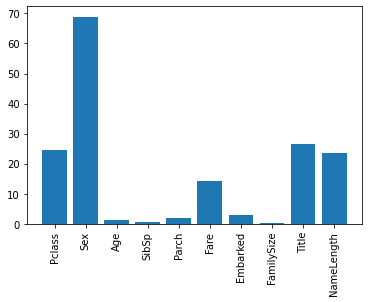

In [13]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
%matplotlib inline
predictors =["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","Title","NameLength"]

selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors],titanic["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation="vertical")
plt.show()

predictors = ["Pclass","Sex","Fare","Title"]

alg = RandomForestClassifier(random_state = 1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

algorithms = [
[GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),["Pclass","Sex","Fare","FamilySize","Title","Age","Embarked"]],
[LogisticRegression(random_state = 1,max_iter = 1000),["Pclass","Sex","Fare","FamilySize","Title","Age","Embarked"]]
]

kf = KFold(n_splits = 3, random_state = 1, shuffle=True)

predictions = []
for i,(train,test) in enumerate(kf.split(titanic)):
	train_target = titanic["Survived"].iloc[train]
	full_test_predictions =[]

	for alg,predictors in algorithms:
		alg.fit(titanic[predictors].iloc[train,:],train_target)
		test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
		full_test_predictions.append(test_predictions)

	test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    
	test_predictions[test_predictions > .5] = 1
	test_predictions[test_predictions <= .5] = 0
	predictions.append(test_predictions)


predictions = np.concatenate(predictions, axis=0)

accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
accuracy

0.5454545454545454

In [15]:
titles = titanic["Name"].apply(get_title)

title_mapping = {"Mr":1, "Miss":2 ,"Mrs":3, "Master":4, "Dr":5, "Rev":6,"Major":7,"Col":7,"Mlle":8,"Countess":8,"Ms":8,"Lady":8,"Jonkheer":9,"Don":9,"Mme":10,"Capt":10,"Sir":10}
for k,v in title_mapping.items():
	titles[titles == k] = v
titanic_test["Title"] = titles

print(pandas.value_counts(titanic_test["Title"]))

titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

1     228
2     101
3      58
4      23
6       3
5       3
10      1
9       1
Name: Title, dtype: int64


In [16]:
predictors = ["Pclass","Sex","Fare","FamilySize","Title","Age","Embarked"]

algorithms = [
[GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),predictors],
[LogisticRegression(random_state = 1,max_iter = 1000),["Pclass","Sex","Fare","FamilySize","Title","Age","Embarked"]]
]

full_predictions = []
for alg,predictors in algorithms:
		alg.fit(titanic[predictors],titanic["Survived"])
		predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
		full_predictions.append(predictions)

predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions


array([0.11039755, 0.46505835, 0.35579692, 0.31387882, 0.26269612,
       0.14287421, 0.37937973, 0.51275865, 0.68286512, 0.2967455 ,
       0.29654452, 0.54985213, 0.73585257, 0.10466493, 0.88051785,
       0.87970402, 0.44571256, 0.1422791 , 0.55224633, 0.53422681,
       0.24949903, 0.27672514, 0.90104314, 0.38780324, 0.87226075,
       0.27920128, 0.74005571, 0.14051188, 0.58490975, 0.12931174,
       0.39152447, 0.50049017, 0.49989626, 0.23456248, 0.40577366,
       0.14539563, 0.28201289, 0.29916182, 0.30611895, 0.40542888,
       0.27465364, 0.64283064, 0.10190382, 0.82619891, 0.89025793,
       0.14673399, 0.28708799, 0.32238157, 0.65593311, 0.50797634,
       0.6820192 , 0.17809982, 0.85131249, 0.87858628, 0.17629294,
       0.16923658, 0.27800336, 0.12608067, 0.33322836, 0.92117073,
       0.13433733, 0.41069518, 0.13318185, 0.69681669, 0.33612269,
       0.87953146, 0.69124246, 0.28593148, 0.60104432, 0.58440936,
       0.42062684, 0.30480505, 0.31117815, 0.35854977, 0.74987